In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import os
PATH="/home/pl/Documents/course_work_1/"
print(os.listdir(PATH))

['y_test_under.csv', 'previous_application.csv', 'План рассказа.doc', 'Курсовая работа Легушева.docx', 'bureau_balance.csv', 'X_test_over.csv', 'installments_payments.csv', 'index.jpeg', 'Курсовая работа 2 курс.pptx', 'Задание_на_курсовую_работу,_курсовой_проект (2).docx', 'X_train_over.csv', 'X_train_under.csv', 'application_train.csv', 'Курсовая работа 2 курс.pdf', 'y_train_under.csv', 'y_test_over.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'sample_submission.csv', 'G1hb1IPhoQQ.jpg', 'y_train_over.csv', 'Курсовая работа Легушева.pdf', 'bureau.csv', '.ipynb_checkpoints', 'HomeCredit_columns_description.csv', 'X_test_under.csv', 'credit_card_balance.csv']


# Data load

In [3]:
app_train = pd.read_csv(PATH + 'application_train.csv',)
app_test = pd.read_csv(PATH + 'application_test.csv',)
pd.set_option('display.max_columns', None)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Data preprocessing

In [4]:
app_train_short = pd.DataFrame(app_train, columns=["TARGET","FLAG_OWN_CAR",'CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE', 
                                                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'LIVINGAPARTMENTS_MODE', 'REGION_RATING_CLIENT_W_CITY',
                                                   'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'ORGANIZATION_TYPE' ])
app_train_short.head()

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,ORGANIZATION_TYPE
0,1,N,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,0.022,2,NaN,NaN,Business Entity Type 3
1,0,N,0,270000.0,State servant,Higher education,Married,House / apartment,Core staff,0.079,1,NaN,NaN,School
2,0,Y,0,67500.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,NaN,2,NaN,NaN,Government
3,0,N,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,NaN,2,NaN,NaN,Business Entity Type 3
4,0,N,0,121500.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,NaN,2,NaN,NaN,Religion


In [5]:
app_train_short.isna().sum()

TARGET                              0
FLAG_OWN_CAR                        0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
OCCUPATION_TYPE                 96391
LIVINGAPARTMENTS_MODE          210199
REGION_RATING_CLIENT_W_CITY         0
AMT_CREDIT_MAX_OVERDUE         307511
AMT_CREDIT_SUM_DEBT            307511
ORGANIZATION_TYPE                   0
dtype: int64

In [6]:
app_train_short.isna().sum()/len(app_train_short)*100

TARGET                           0.000000
FLAG_OWN_CAR                     0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
OCCUPATION_TYPE                 31.345545
LIVINGAPARTMENTS_MODE           68.354953
REGION_RATING_CLIENT_W_CITY      0.000000
AMT_CREDIT_MAX_OVERDUE         100.000000
AMT_CREDIT_SUM_DEBT            100.000000
ORGANIZATION_TYPE                0.000000
dtype: float64

In [7]:
app_train_short.dropna(thresh=0.3*len(app_train_short),axis=1,inplace=True)

In [8]:
app_train_short.isna().sum()/len(app_train_short)*100

TARGET                          0.000000
FLAG_OWN_CAR                    0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
OCCUPATION_TYPE                31.345545
LIVINGAPARTMENTS_MODE          68.354953
REGION_RATING_CLIENT_W_CITY     0.000000
ORGANIZATION_TYPE               0.000000
dtype: float64

In [9]:
app_train_short.dropna(subset=['OCCUPATION_TYPE', 'LIVINGAPARTMENTS_MODE'],axis=0,inplace=True)

In [10]:
app_train_short.isna().sum()/len(app_train_short)*100

TARGET                         0.0
FLAG_OWN_CAR                   0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
OCCUPATION_TYPE                0.0
LIVINGAPARTMENTS_MODE          0.0
REGION_RATING_CLIENT_W_CITY    0.0
ORGANIZATION_TYPE              0.0
dtype: float64

### NAME_INCOME_TYPE categorical preprocessing

In [11]:
names_income_type_uniq = np.array(sorted(set(app_train_short['NAME_INCOME_TYPE'].to_list())))
names_income_type_uniq

array(['Businessman', 'Commercial associate', 'State servant', 'Student',
       'Working'], dtype='<U20')

In [12]:
replace_dict = dict(zip(names_income_type_uniq, range(1, len(names_income_type_uniq) + 1)))
replace_dict

{'Businessman': 1,
 'Commercial associate': 2,
 'State servant': 3,
 'Student': 4,
 'Working': 5}

In [13]:
app_train_short['NAME_INCOME_TYPE'] = app_train_short['NAME_INCOME_TYPE'].replace( 
    replace_dict
    )

In [14]:
app_train_short['NAME_INCOME_TYPE'] = (app_train_short['NAME_INCOME_TYPE'] - min(app_train_short['NAME_INCOME_TYPE'])) / (max(app_train_short['NAME_INCOME_TYPE']) - min(app_train_short['NAME_INCOME_TYPE']))

### FLAG_OWN_CAR categorical preprocessing

In [15]:
flag_own_car_uniq = np.array(sorted(set(app_train_short['FLAG_OWN_CAR'].to_list())))
flag_own_car_uniq

array(['N', 'Y'], dtype='<U1')

In [16]:
replace_dict = dict(zip(flag_own_car_uniq, range(0, len(flag_own_car_uniq))))
replace_dict

{'N': 0, 'Y': 1}

In [17]:
app_train_short['FLAG_OWN_CAR'] = app_train_short['FLAG_OWN_CAR'].replace( 
    replace_dict
    )

### CNT_CHILDREN preprocessing

In [18]:
cnt_chldrn_uniq = np.array(sorted(set(app_train_short['CNT_CHILDREN'].to_list())))
cnt_chldrn_uniq

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 12, 19])

In [19]:
app_train_short['CNT_CHILDREN'] = (app_train_short['CNT_CHILDREN'] - min(app_train_short['CNT_CHILDREN'])) / (max(app_train_short['CNT_CHILDREN']) - min(app_train_short['CNT_CHILDREN']))

### AMT_INCOME_TOTAL preprocessing

In [20]:
app_train_short['AMT_INCOME_TOTAL'] = (app_train_short['AMT_INCOME_TOTAL'] - min(app_train_short['AMT_INCOME_TOTAL'])) / (max(app_train_short['AMT_INCOME_TOTAL']) - min(app_train_short['AMT_INCOME_TOTAL']))

### NAME_EDUCATION_TYPE categorical preprocessing

In [21]:
name_education_type_uniq = np.array(sorted(set(app_train_short['NAME_EDUCATION_TYPE'].to_list())))
name_education_type_uniq

array(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'], dtype='<U29')

In [22]:
replace_dict = dict(zip(name_education_type_uniq, range(1, len(name_education_type_uniq) + 1)))
replace_dict

{'Academic degree': 1,
 'Higher education': 2,
 'Incomplete higher': 3,
 'Lower secondary': 4,
 'Secondary / secondary special': 5}

In [23]:
app_train_short['NAME_EDUCATION_TYPE'] = app_train_short['NAME_EDUCATION_TYPE'].replace( 
    replace_dict
    )

In [24]:
app_train_short['NAME_EDUCATION_TYPE'] = (app_train_short['NAME_EDUCATION_TYPE'] - min(app_train_short['NAME_EDUCATION_TYPE'])) / (max(app_train_short['NAME_EDUCATION_TYPE']) - min(app_train_short['NAME_EDUCATION_TYPE']))

### NAME_FAMILY_STATUS categorical preprocessing

In [25]:
name_family_status_uniq = np.array(sorted(set(app_train_short['NAME_FAMILY_STATUS'].to_list())))

In [26]:
replace_dict = dict(zip(name_family_status_uniq, range(1, len(name_family_status_uniq) + 1)))

In [27]:
app_train_short['NAME_FAMILY_STATUS'] = app_train_short['NAME_FAMILY_STATUS'].replace( 
    replace_dict
    )

In [28]:
app_train_short['NAME_FAMILY_STATUS'] = (app_train_short['NAME_FAMILY_STATUS'] - min(app_train_short['NAME_FAMILY_STATUS'])) / (max(app_train_short['NAME_FAMILY_STATUS']) - min(app_train_short['NAME_FAMILY_STATUS']))

### NAME_HOUSING_TYPE categorical preprocessing

In [29]:
name_housing_type_uniq = np.array(sorted(set(app_train_short['NAME_HOUSING_TYPE'].to_list())))

In [30]:
replace_dict = dict(zip(name_housing_type_uniq, range(1, len(name_housing_type_uniq) + 1)))

In [31]:
app_train_short['NAME_HOUSING_TYPE'] = app_train_short['NAME_HOUSING_TYPE'].replace( 
    replace_dict
    )

In [32]:
app_train_short['NAME_HOUSING_TYPE'] = (app_train_short['NAME_HOUSING_TYPE'] - min(app_train_short['NAME_HOUSING_TYPE'])) / (max(app_train_short['NAME_HOUSING_TYPE']) - min(app_train_short['NAME_HOUSING_TYPE']))

### OCCUPATION_TYPE categorical preprocessing

In [33]:
occupation_type_uniq = np.array(sorted(set(app_train_short['OCCUPATION_TYPE'].to_list())))

In [34]:
replace_dict = dict(zip(occupation_type_uniq, range(1, len(occupation_type_uniq) + 1)))

In [35]:
app_train_short['OCCUPATION_TYPE'] = app_train_short['OCCUPATION_TYPE'].replace( 
    replace_dict
    )

In [36]:
app_train_short['OCCUPATION_TYPE'] = (app_train_short['OCCUPATION_TYPE'] - min(app_train_short['OCCUPATION_TYPE'])) / (max(app_train_short['OCCUPATION_TYPE']) - min(app_train_short['OCCUPATION_TYPE']))

### ORGANIZATION_TYPE categorical preprocessing

In [37]:
organization_type_uniq = np.array(sorted(set(app_train_short['ORGANIZATION_TYPE'].to_list())))

In [38]:
replace_dict = dict(zip(organization_type_uniq, range(1, len(organization_type_uniq) + 1)))

In [39]:
app_train_short['ORGANIZATION_TYPE'] = app_train_short['ORGANIZATION_TYPE'].replace( 
    replace_dict
    )

In [40]:
app_train_short['ORGANIZATION_TYPE'] = (app_train_short['ORGANIZATION_TYPE'] - min(app_train_short['ORGANIZATION_TYPE'])) / (max(app_train_short['ORGANIZATION_TYPE']) - min(app_train_short['ORGANIZATION_TYPE']))

### REGION_RATING_CLIENT_W_CITY preprocessing

In [41]:
app_train_short['REGION_RATING_CLIENT_W_CITY'] = (app_train_short['REGION_RATING_CLIENT_W_CITY'] - min(app_train_short['REGION_RATING_CLIENT_W_CITY'])) / (max(app_train_short['REGION_RATING_CLIENT_W_CITY']) - min(app_train_short['REGION_RATING_CLIENT_W_CITY']))

# Train and metrics

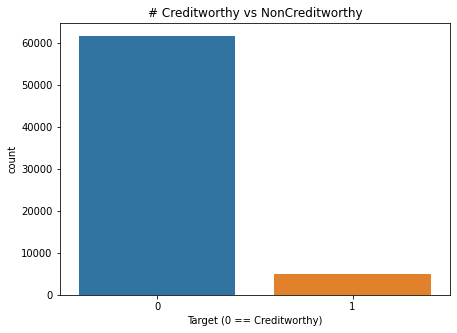

In [42]:
f, ax = plt.subplots(figsize = (7, 5))
sns.countplot(x = 'TARGET', data = app_train_short)
_ = plt.title('# Creditworthy vs NonCreditworthy')
_ = plt.xlabel('Target (0 == Creditworthy)')

In [43]:
base_line_accuracy = 1-np.sum(app_train_short.TARGET)/app_train_short.shape[0]
base_line_accuracy

0.9244869794791791

In [44]:
target_class_count_0, target_class_count_1 = app_train_short['TARGET'].value_counts()
app_train_short_target_class_0 = app_train_short[app_train_short['TARGET'] == 0]
app_train_short_target_class_1 = app_train_short[app_train_short['TARGET'] == 1]
print('target 0:', app_train_short_target_class_0.shape)
print('target 1:', app_train_short_target_class_1.shape)

target 0: (61630, 12)
target 1: (5034, 12)


total target class of 1 and 0:
 0    5034
1    5034
Name: TARGET, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

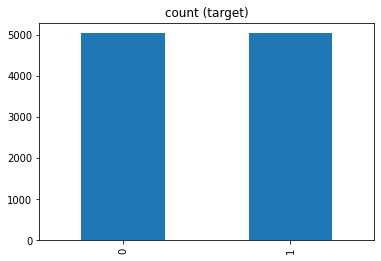

In [45]:
app_train_short_target_class_0_under = app_train_short_target_class_0.sample(target_class_count_1)
test_under = pd.concat([app_train_short_target_class_0_under, app_train_short_target_class_1], axis = 0)
print("total target class of 1 and 0:\n",test_under['TARGET'].value_counts())
test_under['TARGET'].value_counts().plot(kind='bar', title='count (target)')

In [46]:
test_under_shuffled = test_under.sample(frac=1)

In [47]:
X = test_under_shuffled.drop(columns = 'TARGET', axis = 1)
y = test_under_shuffled.TARGET.values
np.random.seed(42)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X, y)

In [48]:
import os

In [49]:
X_train_under.to_csv(os.path.join(PATH, "X_train_under.csv"))
X_test_under.to_csv(os.path.join(PATH, "X_test_under.csv"))

In [50]:
np.savetxt(os.path.join(PATH, "y_train_under.csv"), y_train_under, delimiter=",")
np.savetxt(os.path.join(PATH, "y_test_under.csv"), y_test_under, delimiter=",")

In [51]:
X_train_under = pd.read_csv(PATH + 'X_train_under.csv', index_col=0)
X_test_under = pd.read_csv(PATH + 'X_test_under.csv', index_col=0)
y_train_under = pd.read_csv(PATH + 'y_train_under.csv', header = None)
y_test_under = pd.read_csv(PATH + 'y_test_under.csv', header=None)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_under, y_train_under)

/home/pl/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [54]:
y_test_hat = lr.predict(X_test_under)
y_test_hat_probs = lr.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[675 586]
 [462 794]]
61.26068305914324 %
58.36313071116408 %


In [55]:
print ( classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.593668  0.535289  0.562969      1261
         1.0   0.575362  0.632166  0.602428      1256

    accuracy                       0.583631      2517
   macro avg   0.584515  0.583728  0.582699      2517
weighted avg   0.584533  0.583631  0.582659      2517



In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train_under, y_train_under)

/tmp/ipykernel_6383/767335809.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_under, y_train_under)


RandomForestClassifier()

In [58]:
y_test_hat = rf.predict(X_test_under)
y_test_hat_probs = rf.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[766 495]
 [588 668]]
59.07738020073039 %
56.97258641239571 %


In [59]:
print ( classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.565731  0.607454  0.585851      1261
         1.0   0.574377  0.531847  0.552294      1256

    accuracy                       0.569726      2517
   macro avg   0.570054  0.569651  0.569073      2517
weighted avg   0.570045  0.569726  0.569106      2517



In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()
dt.fit(X_train_under, y_train_under)

DecisionTreeClassifier()

In [62]:
y_test_hat = dt.predict(X_test_under)
y_test_hat_probs = dt.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[675 586]
 [614 642]]
52.3237232102719 %
52.32419547079857 %


In [63]:
print (classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.523662  0.535289  0.529412      1261
         1.0   0.522801  0.511146  0.516908      1256

    accuracy                       0.523242      2517
   macro avg   0.523232  0.523218  0.523160      2517
weighted avg   0.523232  0.523242  0.523172      2517



In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC(probability=True)
svc.fit(X_train_under, y_train_under)

/home/pl/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [66]:
y_test_hat = svc.predict(X_test_under)
y_test_hat_probs = svc.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[701 560]
 [513 743]]
60.89151138768645 %
57.36988478347239 %


In [67]:
print ( classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.577430  0.555908  0.566465      1261
         1.0   0.570223  0.591561  0.580696      1256

    accuracy                       0.573699      2517
   macro avg   0.573826  0.573734  0.573580      2517
weighted avg   0.573833  0.573699  0.573566      2517



In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gb = GradientBoostingClassifier()
gb.fit(X_train_under, y_train_under)

/home/pl/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [70]:
y_test_hat = gb.predict(X_test_under)
y_test_hat_probs = gb.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[732 529]
 [462 794]]
63.586395136808825 %
60.62773142630115 %


In [71]:
print ( classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.613065  0.580492  0.596334      1261
         1.0   0.600151  0.632166  0.615743      1256

    accuracy                       0.606277      2517
   macro avg   0.606608  0.606329  0.606038      2517
weighted avg   0.606621  0.606277  0.606019      2517

